In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('HFP.csv')
df.head()

,Year,Annual,Freeze,Flairs,Hurricaines,Earthquakes
0,1900,19,Yes,No,Yes,no
1,1901,21,No,No,No,no
2,1902,27,No,No,No,no
3,1903,20,Yes,No,No,no
4,1904,22,No,No,No,no


In [5]:
df['Hurricaines'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
df.head()

,Year,Annual,Freeze,Flairs,Hurricaines,Earthquakes
0,1900,19,Yes,No,0,no
1,1901,21,No,No,1,no
2,1902,27,No,No,1,no
3,1903,20,Yes,No,1,no
4,1904,22,No,No,1,no


In [6]:
df['Flairs'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
df.head()

,Year,Annual,Freeze,Flairs,Hurricaines,Earthquakes
0,1900,19,Yes,1,0,no
1,1901,21,No,1,1,no
2,1902,27,No,1,1,no
3,1903,20,Yes,1,1,no
4,1904,22,No,1,1,no


In [7]:
df['Earthquakes'].replace(to_replace=['Yes','no'], value=[0,1],inplace=True)
df.head()

,Year,Annual,Freeze,Flairs,Hurricaines,Earthquakes
0,1900,19,Yes,1,0,1
1,1901,21,No,1,1,1
2,1902,27,No,1,1,1
3,1903,20,Yes,1,1,1
4,1904,22,No,1,1,1


In [8]:
Feature = df[['Year','Annual','Flairs','Hurricaines','Earthquakes']]
Feature.head()

,Year,Annual,Flairs,Hurricaines,Earthquakes
0,1900,19,1,0,1
1,1901,21,1,1,1
2,1902,27,1,1,1
3,1903,20,1,1,1
4,1904,22,1,1,1


In [9]:
y = df['Freeze'].values
y[0:6]

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [10]:
X = Feature
X[0:123]

,Year,Annual,Flairs,Hurricaines,Earthquakes
0,1900,19,1,0,1
1,1901,21,1,1,1
2,1902,27,1,1,1
3,1903,20,1,1,1
4,1904,22,1,1,1
...,...,...,...,...,...
118,2018,19,1,0,1
119,2019,30,1,1,1
120,2020,30,1,1,1
121,2021,13,1,1,1


In [11]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[1:123]

array([[-1.68986152, -0.39653453,  0.22645541,  0.56796183,  0.59299945],
       [-1.66169716,  0.66376433,  0.22645541,  0.56796183,  0.59299945],
       [-1.6335328 , -0.57325101,  0.22645541,  0.56796183,  0.59299945],
       [-1.60536844, -0.21981806,  0.22645541,  0.56796183,  0.59299945],
       [-1.57720408, -1.4568334 ,  0.22645541,  0.56796183,  0.59299945],
       [-1.54903972,  1.90077967,  0.22645541,  0.56796183, -1.6863422 ],
       [-1.52087536,  1.01719728,  0.22645541,  0.56796183,  0.59299945],
       [-1.49271101,  0.31033137,  0.22645541,  0.56796183, -1.6863422 ],
       [-1.46454665, -0.39653453,  0.22645541,  0.56796183,  0.59299945],
       [-1.43638229, -0.39653453,  0.22645541,  0.56796183,  0.59299945],
       [-1.40821793, -1.28011692,  0.22645541,  0.56796183,  0.59299945],
       [-1.38005357, -1.4568334 ,  0.22645541,  0.56796183,  0.59299945],
       [-1.35188921,  0.1336149 ,  0.22645541,  0.56796183,  0.59299945],
       [-1.32372485,  0.1336149 ,  0.2

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (98, 5) (98,)
Test set: (25, 5) (25,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh 

KNeighborsClassifier(n_neighbors=1)

In [14]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
KNeighborsClassifier(n_neighbors=1)
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  1.0
Test set Accuracy:  0.8


In [15]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
KNeighborsClassifier(n_neighbors=1)
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9693877551020408
Test set Accuracy:  0.76


In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[15  3]
 [ 3  4]]
              precision    recall  f1-score   support

          No       0.83      0.83      0.83        18
         Yes       0.57      0.57      0.57         7

    accuracy                           0.76        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.76      0.76      0.76        25



Text(0, 0.5, 'Mean Error')

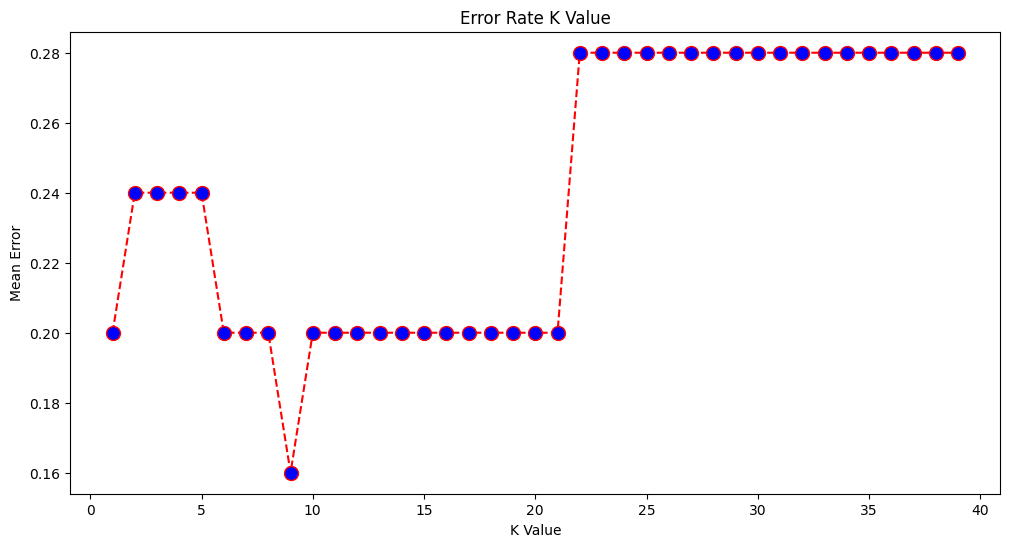

In [26]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [72]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
KNeighborsClassifier(n_neighbors=1)
yhat = neigh.predict(X_test)
yhat[0:123]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9387755102040817
Test set Accuracy:  0.84


In [73]:
# predict the response
pred = neigh.predict(X_test)

#Predict Output
pred= knn.predict([[2022,27,0,1,1]])

In [74]:
print(pred)

['No']


In [68]:
# predict the response
pred = neigh.predict(X_test)

#Predict Output
pred= knn.predict([[2023,27,0,1,1]])
print(pred)

['No']


In [69]:
# predict the response
pred = neigh.predict(X_test)

#Predict Output
pred= knn.predict([[2050,27,0,1,1]])
print(pred)

['No']


In [85]:
# predict the response
pred = neigh.predict(X_test)

#Predict Output
pred= knn.predict([[2023,15,0,1,0]])
print(pred)

['No']
